https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=ROC%20Curves%20and%20AUC%20in%20Python,-We%20can%20plot&text=The%20AUC%20for%20the%20ROC,probabilities%20for%20the%201%20class.

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

ns_probs = [0 for _ in range(len(y_test))]

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print("No Skil: ROC AUC=%.3f" %(ns_auc))
print("Logistic Reg: ROC AUC=%.3f" %(lr_auc))

No Skil: ROC AUC=0.500
Logistic Reg: ROC AUC=0.903


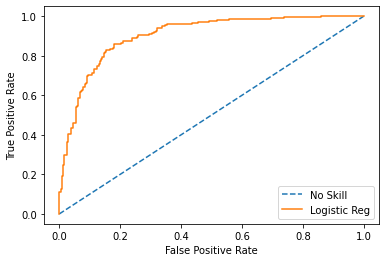

In [13]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Reg')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()